In [1]:
from matrix_builder import elmfbpinn
from networks import initWeightBiases
from windows import initInterval
import jax
import jax.numpy as jnp

## Define the Exact Solution and RHS function

In [2]:
# Define the exact solution for the damped harmonic oscillator
m = 1
delta = 2
mu = 2 * delta
omega_0 = 80
k = omega_0**2
omega = jnp.sqrt(omega_0**2 - delta**2)

def exact_solution_cos(t):
    phi = jnp.arctan(-delta / omega)
    A = 1 / (2 * jnp.cos(phi))
    return 2 * A * jnp.exp(-delta * t) * jnp.cos(phi + omega * t)

def zero_RHS(t):
    return 0.0 * t

## Define ELM-FBPINN function parameters

In [3]:
RHS_func = zero_RHS
u_func = exact_solution_cos
n_train = 150  # number of training points
n_test = 300  # number of test points
J = 20  # number of subdomains
C = 32  # number of basis functions
R = 25  # sampling range
xmin, xmax = 0, 1  # global domain
params_hidden, params_out, w_key, b_key = initWeightBiases(J, [1, C, 1], R)  # initialize weights and biases (J - number of subdomains, layer - number of neurons in each layer, R - sampling range)  
ranges = initInterval(J, xmin, xmax, width=1.9, verbose=False)  # initialize subdomains
width = 1.9  # subdomain width
sigma = jnp.sin  # activation function
title = "1D Damped Harmonic Oscillator"  # title of the solution plot

### Run elmfbpinn()

Creating M_ode...
M_ode created in 1.19 seconds.
Creating B_train...
Time taken for solver: 0.0055 seconds
Creating M_sol...
M_sol created in 1.38 seconds.
Test Loss Value: 2.92e-03


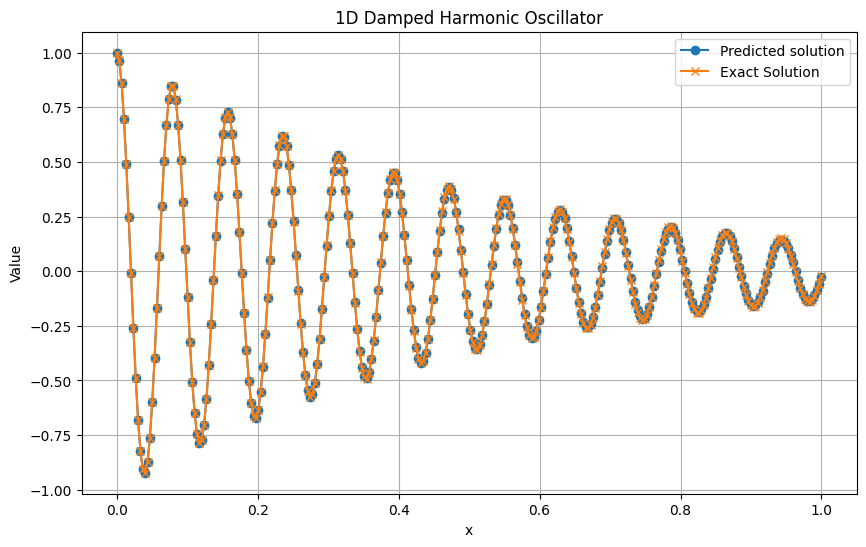

Condition number of M_ode_sparse: 1.26e+07
Condition number of M_sol_sparse: 2.56e+09
Condition number of LHS: 2.34e+11
Total time taken: 5.56 seconds.


In [4]:
results = elmfbpinn(
    RHS_func,
    u_func,
    n_train,
    n_test,
    J,
    ranges,
    xmin,
    xmax,
    width,
    sigma,
    title,
    params_hidden,
    lmda=1,
    plot_window=False,
    debug=False,
)

#### To extract the results for closer inspection
 - lsq - contains the matrices and vectors used in the least squares solver.
 - Ms - contains M_sol, M_ode_sparse, M_sol_sparse, the latter 2 being just the values in a sparse csc format
 - B - contains B_train and g_train, i.e. the boundary condition matrix and the RHS boundary condition matrix
 - a - output weight vector
 - loss - final l1 loss
 - x - contains x_train and x_test
 - f - contains exact solution evaluations on x_test
 - lhs_condition - condition number of the LHS matrix in the linear solve
 - xmins, xmaxs - interval values
 - total_elapsed_time - time taken to run
 - rows, columns - indexes for rows and columns in the sparse test matrix 

In [5]:
lsq, Ms, B, a, u, loss, x, f, lhs_condition, xmins, xmaxs, total_elapsed_time, rows, columns = results
M_ode_sparse, B_ode_scaled, lmda, exact_solution, g_train = lsq

### If you would like to use the "old" elmfbpinn function

In [6]:
from matrix_builder_old import elmfbpinn_old

Creating M_ode...
M_ode created in 0.30 seconds.
Creating B_train...
B_train created in 0.91 seconds.
Time taken for solver: 0.0040 seconds
Creating M_sol...
M_sol created in 0.57 seconds.
Test Loss Value: 1.94e-03


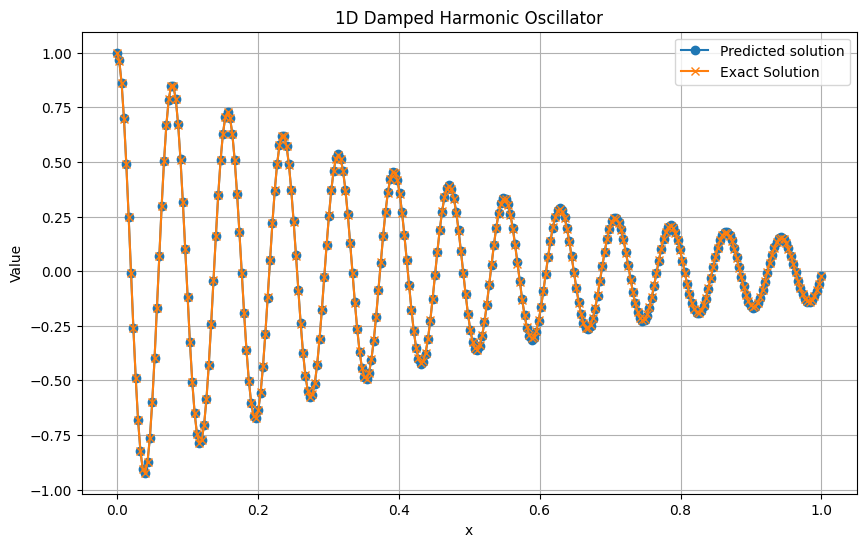

Condition number of M_ode_sparse: 1.28e+07
Condition number of M_sol_sparse: 2.56e+09
Condition Number of LHS: 3.09e+11
Total time taken: 2.33 seconds.


In [7]:
old_results = elmfbpinn_old(
    RHS_func,
    u_func,
    n_train,
    n_test,
    J,
    C,
    R,
    xmin,
    xmax,
    width,
    sigma,
    title,
    w_key=None,
    b_key=None,
    lmda=1,
    plot_window=False,
    debug=False,
)

In [9]:
lsq, Ms, B, a, u, loss, x, f, lhs_condition, xmins, xmaxs, total_elapsed_time, rows, columns = old_results
M_ode_sparse, B_ode_scaled, lmda, exact_solution, g_train = lsq